In [1]:
# Cargar librerias

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

In [2]:
# Cargar datos

df_orignal = pd.read_csv('202220_Laboratorio_2_data_Empresas_mas_grandes_del_pais_2018.csv', sep=';', encoding = 'utf-8', index_col=0, decimal=',')

# Entendimiento y preparación de los datos

In [3]:
# Observar el número de filas y columnas

df_orignal.shape

(1068, 19)

In [4]:
# Ver una muestra de los datos

df_orignal.head()

,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
No.,,,,,,,,,,,,,,,,,,,
1,860003563,ABB LTDA,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,"C2711 - Fabricación de motores, generadores y ...",MANUFACTURA,3.571775e+09,-5.872548e+07,2.956848e+09,2.476739e+09,4.801089e+08,4.005049e+09,-8.752900e+07,2.875460e+09,$ 2341172480,5.342871e+08,NIIF PLENAS-GRUPO 1
2,900138670,C.I BIOCOSTA S.A,SUPERSOCIEDADES,Costa Atlántica,MAGDALENA,SANTA-MARTA-MAGDALENA,G4610 - Comercio al por mayor a cambio de una ...,COMERCIO,6.018902e+09,3.504944e+07,1.207011e+09,1.031424e+09,1.755873e+08,4.994552e+09,1.083777e+07,1.020832e+09,$ 894986480,1.258455e+08,NIIF PLENAS-GRUPO 1
3,890302629,CONSTRUCTORA MELENDEZ S.A.,SUPERSOCIEDADES,Costa Pacífica,VALLE,CALI-VALLE,F4111 - Construcción de edificios residenciales,CONSTRUCCIÓN,1.739284e+09,1.735105e+07,3.030767e+09,2.163544e+09,8.672231e+08,1.039942e+09,-3.877247e+07,2.615650e+09,$ 1748991200,8.666590e+08,NIIF PLENAS-GRUPO 1
4,811004055,EMDISALUD,SUPERSALUD,Costa Atlántica,CORDOBA,MONTERIA,O8430- Actividades de planes de seguridad soci...,SERVICIOS,4.033887e+10,-3.016582e+10,9.908133e+09,4.950861e+10,-3.960047e+10,3.696528e+10,-1.086227e+10,9.807867e+09,$ 19246633716,-9.438767e+09,NIIF PYMES-GRUPO 2
5,890503314,CERAMICA ITALIA SA,SUPERSOCIEDADES,Centro - Oriente,NORTE DE SANTANDER,CUCUTA-NORTE DE SANTANDER,C2392 - Fabricación de materiales de arcilla p...,MANUFACTURA,1.419514e+09,4.582130e+06,1.498588e+09,4.971313e+08,1.001457e+09,1.360935e+09,3.250460e+07,1.509246e+09,$ 490200920,1.019045e+09,NIIF PYMES-GRUPO 2


In [5]:
# Revisar las características de los datos: completitud y tipo de dato

df_orignal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1 to 1068
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NIT                            1068 non-null   int64  
 1   RAZON SOCIAL                   1068 non-null   object 
 2   SUPERVISOR                     1068 non-null   object 
 3   REGIÓN                         1067 non-null   object 
 4   DEPARTAMENTO DOMICILIO         1063 non-null   object 
 5   CIUDAD DOMICILIO               1064 non-null   object 
 6   CIIU                           1067 non-null   object 
 7   MACROSECTOR                    1065 non-null   object 
 8   INGRESOS OPERACIONALES
2018*  1067 non-null   float64
 9   GANANCIA (PERDIDA) 2018        1067 non-null   float64
 10  TOTAL ACTIVOS 2018             1066 non-null   float64
 11  TOTAL PASIVOS 2018             1066 non-null   float64
 12  TOTAL PATRIMONIO 2018          1064 non-null   fl

In [6]:
print(len(df_orignal["NIT"].unique()))
len(df_orignal["RAZON SOCIAL"].unique())


1000


1000

In [7]:
dups = df_orignal.pivot_table(index = ['RAZON SOCIAL'], aggfunc ='size') 
dups[dups>1]

RAZON SOCIAL
A LAUMAYER Y COMPAÑIA EXPORTADORES DE CAFE S.A.S.                                                           2
ACCENTURE                                                                                                   2
ACCION SAS                                                                                                  2
ARCOS DORADOS COLOMBIA SAS                                                                                  2
ARYSTA LIFESCIENCE COLOMBIA SAS                                                                             2
                                                                                                           ..
Texcomercial - Texco SAS                                                                                    2
VALOREM S.A                                                                                                 2
VENTAS Y MARCAS SAS                                                                                        

In [8]:
dups = df_orignal.pivot_table(index = ['NIT'], aggfunc ='size') 
dups[dups>1]

NIT
800021308    2
800106774    2
800110980    2
800137960    2
800141770    2
            ..
900306309    2
900327290    2
900780510    2
900780755    2
900891350    2
Length: 68, dtype: int64

In [9]:
# Crear Data Frame con los datos preparados

df_prep = df_orignal.copy()

In [10]:
# Revisar consistencia en los datos no númericos

print('Supervisor:')
print(df_prep['SUPERVISOR'].unique())
print('\n')

print('Región:')
print(df_prep['REGIÓN'].unique())
print('\n')

print('Departamento domicilio:')
print(df_prep['DEPARTAMENTO DOMICILIO'].unique())
print('\n')

print('Ciudad domicilio:')
print(df_prep['CIUDAD DOMICILIO'].unique())
print('\n')

print('Clasificación Internacional Industrial Uniforme:')
print(df_prep['CIIU'].unique())
print('\n')

print('Macrosector:')
print(df_prep['MACROSECTOR'].unique())
print('\n')

print('Grupo NIIF:')
print(df_prep['GRUPO EN NIIF'].unique())
print('\n')

Supervisor:
['SUPERSOCIEDADES' 'SUPERSALUD' 'SUPERVIGILANCIA' 'SUPERFINANCIERA'
 'SUPERSERVICIOS' 'SUPERSUCIEDADES']


Región:
['Bogotá - Cundinamarca' 'Costa Atlántica' 'Costa Pacífica'
 'Centro - Oriente' 'Antioquia' 'Costa Atlantica' 'Otros' 'Eje Cafetero'
 nan]


Departamento domicilio:
['BOGOTA D.C.' 'MAGDALENA' 'VALLE' 'CORDOBA' 'NORTE DE SANTANDER'
 'CUNDINAMARCA' 'ANTIOQUIA' 'ATLANTICO' 'GUAJIRA' 'CAUCA' 'SANTANDER'
 'BOLIVAR' 'CASANARE' nan 'RISARALDA' 'BOGOTÁ D.C.' 'CALDAS' 'META'
 'BOYACA' 'HUILA' 'NARIÑO' 'CHOCO' 'SAN ANDRES Y PROVIDENCIA' 'TOLIMA'
 'CESAR' 'SUCRE' 'QUINDIO']


Ciudad domicilio:
['BOGOTA-D.C.-BOGOTA D.C.' 'SANTA-MARTA-MAGDALENA' 'CALI-VALLE' 'MONTERIA'
 'CUCUTA-NORTE DE SANTANDER' 'COTA-CUNDINAMARCA' 'TOCANCIPA-CUNDINAMARCA'
 'ENVIGADO-ANTIOQUIA' 'CHIA-CUNDINAMARCA' 'BARRANQUILLA-ATLANTICO'
 'MEDELLIN-ANTIOQUIA' 'YUMBO-VALLE' 'PALMIRA-VALLE' 'RIOHACHA'
 'CALDAS-ANTIOQUIA' 'GUACHENE-CAUCA' 'FLORIDABLANCA-SANTANDER'
 'CARTAGENA-BOLIVAR' 'JAMUNDI-VALLE' 'LA-ES

In [11]:
dups = df_prep.pivot_table(index = ['DEPARTAMENTO DOMICILIO'], aggfunc ='size') 
print(dups)

DEPARTAMENTO DOMICILIO
ANTIOQUIA                   171
ATLANTICO                    59
BOGOTA D.C.                 519
BOGOTÁ D.C.                   8
BOLIVAR                      24
BOYACA                        1
CALDAS                       10
CASANARE                      2
CAUCA                        16
CESAR                         1
CHOCO                         1
CORDOBA                       4
CUNDINAMARCA                 74
GUAJIRA                       2
HUILA                         2
MAGDALENA                     7
META                          2
NARIÑO                        4
NORTE DE SANTANDER            4
QUINDIO                       1
RISARALDA                    12
SAN ANDRES Y PROVIDENCIA      1
SANTANDER                    25
SUCRE                         1
TOLIMA                        2
VALLE                       110
dtype: int64


In [12]:
# Los datos parecen estar bastante completos por lo cual,
# se considera razonable eliminar los datos con valors nulos

df_prep = df_prep.dropna()
len(df_prep)

1038

In [13]:
df_prep.loc[df_prep["DEPARTAMENTO DOMICILIO"].str.contains("BOGOT"), 'DEPARTAMENTO DOMICILIO']= "BOGOTA D.C."

In [14]:
# Quitar los datos duplicados

df_prep = df_prep.drop_duplicates()
len(df_prep)

977

In [15]:
print(len(df_prep["NIT"].unique()))
len(df_prep["RAZON SOCIAL"].unique())

972


972

In [16]:
dups = df_prep.pivot_table(index = ['RAZON SOCIAL'], aggfunc ='size') 
dups[dups>1]

RAZON SOCIAL
ACCION SAS                                      2
CONINSA RAMON H S.A                             2
GRAN COLOMBIA GOLD SEGOVIA SUCURSAL COLOMBIA    2
PROCESADORA DE LECHES S.A.                      2
SCHNEIDER ELECTRIC DE COLOMBIA SAS              2
dtype: int64

In [17]:
# Convertir variables que deberian ser númericas
df_prep['TOTAL PASIVOS 2017'] = df_prep['TOTAL PASIVOS 2017'].str.extract('(\d+)', expand=False)
df_prep['TOTAL PASIVOS 2017'] = df_prep['TOTAL PASIVOS 2017'].astype('float64')
df_prep['TOTAL PASIVOS 2017']

No.
1       2.341172e+09
2       8.949865e+08
3       1.748991e+09
4       1.924663e+10
5       4.902009e+08
            ...     
1062    1.220842e+09
1063    4.265948e+08
1064    3.969365e+08
1065    5.435688e+08
1068    1.459223e+09
Name: TOTAL PASIVOS 2017, Length: 977, dtype: float64

In [18]:
print(float(df_prep[df_prep["RAZON SOCIAL"]=="ACCION SAS"].iloc[0]["TOTAL ACTIVOS 2017"])-float(df_prep[df_prep["RAZON SOCIAL"]=="ACCION SAS"].iloc[0]["TOTAL PASIVOS 2017"]))
print(df_prep[df_prep["RAZON SOCIAL"]=="ACCION SAS"].iloc[1])
df_prep[df_prep["RAZON SOCIAL"]=="ACCION SAS"]

117187300.0
NIT                                                                        890309556
RAZON SOCIAL                                                              ACCION SAS
SUPERVISOR                                                           SUPERSOCIEDADES
REGIÓN                                                                Costa Pacífica
DEPARTAMENTO DOMICILIO                                                         VALLE
CIUDAD DOMICILIO                                                          CALI-VALLE
CIIU                               N7820 - Actividades de agencias de empleo temp...
MACROSECTOR                                                                SERVICIOS
INGRESOS OPERACIONALES\r\n2018*                                          2.73214e+09
GANANCIA (PERDIDA) 2018                                                  -4.5023e+07
TOTAL ACTIVOS 2018                                                       1.12389e+09
TOTAL PASIVOS 2018                                   

,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
No.,,,,,,,,,,,,,,,,,,,
694,890309556,ACCION SAS,SUPERSOCIEDADES,Costa Pacífica,VALLE,CALI-VALLE,N7820 - Actividades de agencias de empleo temp...,SERVICIOS,2.732144e+09,-45022980.0,1.123891e+09,1.051727e+09,72164320.0,3.036906e+09,-59953470.0,1.111259e+09,994071870.0,117187300.0,NIIF PLENAS-GRUPO 1
737,890309556,ACCION SAS,SUPERSOCIEDADES,Costa Pacífica,VALLE,CALI-VALLE,N7820 - Actividades de agencias de empleo temp...,SERVICIOS,2.732144e+09,-45022980.0,1.123891e+09,1.051727e+09,72164320.0,3.036906e+09,-59953470.0,1.111259e+09,994071870.0,117187.3,NIIF PLENAS-GRUPO 1


In [19]:
df_prep = df_prep.drop(737)

In [20]:
print(df_prep[df_prep["RAZON SOCIAL"]=="CONINSA RAMON H S.A"].iloc[0])
df_prep[df_prep["RAZON SOCIAL"]=="CONINSA RAMON H S.A"]

NIT                                                                        890911431
RAZON SOCIAL                                                     CONINSA RAMON H S.A
SUPERVISOR                                                           SUPERSUCIEDADES
REGIÓN                                                                     Antioquia
DEPARTAMENTO DOMICILIO                                                     ANTIOQUIA
CIUDAD DOMICILIO                                                  MEDELLIN-ANTIOQUIA
CIIU                               F4290 - Construcción de otras obras de ingenie...
MACROSECTOR                                                             CONSTRUCCIÓN
INGRESOS OPERACIONALES\r\n2018*                                          2.26832e+09
GANANCIA (PERDIDA) 2018                                                  1.23415e+08
TOTAL ACTIVOS 2018                                                       5.32706e+09
TOTAL PASIVOS 2018                                               

,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
No.,,,,,,,,,,,,,,,,,,,
134,890911431,CONINSA RAMON H S.A,SUPERSUCIEDADES,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,F4290 - Construcción de otras obras de ingenie...,CONSTRUCCIÓN,2.268321e+09,123415130.0,5.327061e+09,3.515326e+09,1.811735e+09,2.054084e+09,111461890.0,4.646103e+09,2.935282e+09,1.710821e+09,NIIF PLENAS-GRUPO 1
664,890911431,CONINSA RAMON H S.A,SUPERSOCIEDADES,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,F4290 - Construcción de otras obras de ingenie...,CONSTRUCCIÓN,2.268321e+09,123415130.0,5.327061e+09,3.515326e+09,1.811735e+09,2.054084e+09,111461890.0,4.646103e+09,2.935282e+09,1.710821e+09,NIIF PLENAS-GRUPO 1


In [21]:
df_prep = df_prep.drop(134)

In [22]:
print(df_prep[df_prep["RAZON SOCIAL"]=="GRAN COLOMBIA GOLD SEGOVIA SUCURSAL COLOMBIA"].iloc[0])
df_prep[df_prep["RAZON SOCIAL"]=="GRAN COLOMBIA GOLD SEGOVIA SUCURSAL COLOMBIA"]


NIT                                                                        900306309
RAZON SOCIAL                            GRAN COLOMBIA GOLD SEGOVIA SUCURSAL COLOMBIA
SUPERVISOR                                                           SUPERSOCIEDADES
REGIÓN                                                                     Antioquia
DEPARTAMENTO DOMICILIO                                                     ANTIOQUIA
CIUDAD DOMICILIO                                                  MEDELLIN-ANTIOQUIA
CIIU                               B0722 - Extracción de oro y otros metales prec...
MACROSECTOR                                                     MINERO-HIDROCARBUROS
INGRESOS OPERACIONALES\r\n2018*                                          7.06372e+09
GANANCIA (PERDIDA) 2018                                                  1.66714e+09
TOTAL ACTIVOS 2018                                                       6.28303e+09
TOTAL PASIVOS 2018                                               

,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
No.,,,,,,,,,,,,,,,,,,,
752,900306309,GRAN COLOMBIA GOLD SEGOVIA SUCURSAL COLOMBIA,SUPERSOCIEDADES,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,B0722 - Extracción de oro y otros metales prec...,MINERO-HIDROCARBUROS,7.063715e+09,1.667144e+09,6.283026e+09,2.501498e+09,3.781528e+09,5.441783e+09,7.000000e+00,5.430142e+09,2.065248e+09,3.364893e+09,NIIF PLENAS-GRUPO 1
806,900306309,GRAN COLOMBIA GOLD SEGOVIA SUCURSAL COLOMBIA,SUPERSOCIEDADES,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,B0722 - Extracción de oro y otros metales prec...,MINERO-HIDROCARBUROS,7.063715e+09,1.667144e+09,6.283026e+09,2.501498e+09,3.781528e+09,5.441783e+09,1.956992e+09,5.430142e+09,2.065248e+09,3.364893e+09,NIIF PLENAS-GRUPO 1


In [23]:
df_prep = df_prep.drop(752)

In [24]:
print(float(df_prep[df_prep["RAZON SOCIAL"]=="PROCESADORA DE LECHES S.A."].iloc[0]["TOTAL ACTIVOS 2017"])-float(df_prep[df_prep["RAZON SOCIAL"]=="PROCESADORA DE LECHES S.A."].iloc[0]["TOTAL PASIVOS 2017"]))
print(df_prep[df_prep["RAZON SOCIAL"]=="PROCESADORA DE LECHES S.A."].iloc[1])
df_prep[df_prep["RAZON SOCIAL"]=="PROCESADORA DE LECHES S.A."]

492619070.0
NIT                                                               890903711
RAZON SOCIAL                                     PROCESADORA DE LECHES S.A.
SUPERVISOR                                                  SUPERSOCIEDADES
REGIÓN                                                Bogotá - Cundinamarca
DEPARTAMENTO DOMICILIO                                          BOGOTA D.C.
CIUDAD DOMICILIO                                    BOGOTA-D.C.-BOGOTA D.C.
CIIU                               C1040 - Elaboración de productos lácteos
MACROSECTOR                                                     MANUFACTURA
INGRESOS OPERACIONALES\r\n2018*                                 1.53046e+09
GANANCIA (PERDIDA) 2018                                        -5.17298e+07
TOTAL ACTIVOS 2018                                              1.02285e+09
TOTAL PASIVOS 2018                                              5.82033e+08
TOTAL PATRIMONIO 2018                                           4.40814e+08


,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
No.,,,,,,,,,,,,,,,,,,,
539,890903711,PROCESADORA DE LECHES S.A.,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,C1040 - Elaboración de productos lácteos,MANUFACTURA,1.530459e+09,-51729780.0,1.022847e+09,582032790.0,440814450.0,1.347963e+09,-112035990.0,1.042716e+09,550096980.0,4.926191e+08,NIIF PLENAS-GRUPO 1
877,890903711,PROCESADORA DE LECHES S.A.,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,C1040 - Elaboración de productos lácteos,MANUFACTURA,1.530459e+09,-51729780.0,1.022847e+09,582032790.0,440814450.0,1.347963e+09,-112035990.0,1.042716e+09,550096980.0,4.926191e+05,NIIF PLENAS-GRUPO 1


In [25]:
df_prep = df_prep.drop(877)

In [26]:
print(float(df_prep[df_prep["RAZON SOCIAL"]=="SCHNEIDER ELECTRIC DE COLOMBIA SAS"].iloc[0]["TOTAL ACTIVOS 2018"])-float(df_prep[df_prep["RAZON SOCIAL"]=="SCHNEIDER ELECTRIC DE COLOMBIA SAS"].iloc[0]["TOTAL PASIVOS 2018"]))
print(df_prep[df_prep["RAZON SOCIAL"]=="SCHNEIDER ELECTRIC DE COLOMBIA SAS"].iloc[1])
df_prep[df_prep["RAZON SOCIAL"]=="SCHNEIDER ELECTRIC DE COLOMBIA SAS"]

417222790.0
NIT                                                                        890311875
RAZON SOCIAL                                      SCHNEIDER ELECTRIC DE COLOMBIA SAS
SUPERVISOR                                                           SUPERSOCIEDADES
REGIÓN                                                         Bogotá - Cundinamarca
DEPARTAMENTO DOMICILIO                                                   BOGOTA D.C.
CIUDAD DOMICILIO                                             BOGOTA-D.C.-BOGOTA D.C.
CIIU                               C2790 - Fabricación de otros tipos de equipo e...
MACROSECTOR                                                              MANUFACTURA
INGRESOS OPERACIONALES\r\n2018*                                          2.64256e+09
GANANCIA (PERDIDA) 2018                                                  -4.7857e+07
TOTAL ACTIVOS 2018                                                        1.8972e+09
TOTAL PASIVOS 2018                                   

,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
No.,,,,,,,,,,,,,,,,,,,
185,890311875,SCHNEIDER ELECTRIC DE COLOMBIA SAS,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,C2790 - Fabricación de otros tipos de equipo e...,MANUFACTURA,2.642565e+09,-47856980.0,1.897198e+09,1.479975e+09,417222790.0,2.659487e+09,39365720.0,1.946947e+09,1.449205e+09,497742260.0,NIIF PLENAS-GRUPO 1
969,890311875,SCHNEIDER ELECTRIC DE COLOMBIA SAS,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,C2790 - Fabricación de otros tipos de equipo e...,MANUFACTURA,2.642565e+09,-47856980.0,1.897198e+09,1.479975e+09,99.0,2.659487e+09,39365720.0,1.946947e+09,1.449205e+09,497742260.0,NIIF PLENAS-GRUPO 1


In [27]:
df_prep = df_prep.drop(979)
len(df_prep)

972

In [28]:
# Describit los datos

df_prep.describe()

,NIT,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017
count,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.720000e+02,9.710000e+02,9.720000e+02
mean,8.596244e+08,1.130675e+10,6.389087e+08,1.162509e+10,6.572489e+09,6.486668e+11,9.600019e+09,1.320463e+08,1.040773e+10,5.658701e+09,4.900163e+09
std,3.792057e+07,4.351810e+10,5.270016e+09,4.811824e+10,2.724218e+10,2.006643e+13,3.585828e+10,5.436655e+09,4.476329e+10,2.606582e+10,2.362627e+10
min,8.000003e+08,1.343546e+09,-6.993593e+10,7.329964e+07,9.900000e+01,-7.303930e+10,0.000000e+00,-7.977997e+10,6.788196e+07,6.309000e+04,-6.786768e+10
25%,8.300119e+08,1.803964e+09,1.003136e+07,1.238163e+09,6.735867e+08,3.176617e+08,1.584274e+09,3.949190e+06,1.123320e+09,6.012292e+08,2.730547e+08
50%,8.600697e+08,2.804048e+09,6.747932e+07,2.555374e+09,1.398696e+09,8.776235e+08,2.502846e+09,5.115662e+07,2.213970e+09,1.199147e+09,7.963204e+08
75%,8.913002e+08,6.356102e+09,2.741170e+08,6.542351e+09,3.635828e+09,2.674450e+09,5.400559e+09,1.994451e+08,5.848946e+09,3.032011e+09,2.293219e+09
max,9.010975e+08,7.014040e+11,1.155640e+11,1.137620e+12,5.654820e+11,6.256140e+14,5.948910e+11,6.620412e+10,1.075490e+12,5.965040e+11,4.789860e+11


In [29]:
# Quitar datos atipicos

q_low = df_prep["INGRESOS OPERACIONALES\r\n2018*"].quantile(0.01)
q_hi  = df_prep["INGRESOS OPERACIONALES\r\n2018*"].quantile(0.99)
df_prep = df_prep[(df_prep["INGRESOS OPERACIONALES\r\n2018*"] < q_hi) & (df_prep["INGRESOS OPERACIONALES\r\n2018*"] > q_low)]

q_low = df_prep["GANANCIA (PERDIDA) 2018"].quantile(0.01)
q_hi  = df_prep["GANANCIA (PERDIDA) 2018"].quantile(0.99)
df_prep = df_prep[(df_prep["GANANCIA (PERDIDA) 2018"] < q_hi) & (df_prep["GANANCIA (PERDIDA) 2018"] > q_low)]

q_low = df_prep["TOTAL ACTIVOS 2018"].quantile(0.01)
q_hi  = df_prep["TOTAL ACTIVOS 2018"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL ACTIVOS 2018"] < q_hi) & (df_prep["TOTAL ACTIVOS 2018"] > q_low)]

q_low = df_prep["TOTAL PASIVOS 2018"].quantile(0.01)
q_hi  = df_prep["TOTAL PASIVOS 2018"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL PASIVOS 2018"] < q_hi) & (df_prep["TOTAL PASIVOS 2018"] > q_low)]

q_low = df_prep["TOTAL PATRIMONIO 2018"].quantile(0.01)
q_hi  = df_prep["TOTAL PATRIMONIO 2018"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL PATRIMONIO 2018"] < q_hi) & (df_prep["TOTAL PATRIMONIO 2018"] > q_low)]

q_low = df_prep["INGRESOS OPERACIONALES\r\n2017*"].quantile(0.01)
q_hi  = df_prep["INGRESOS OPERACIONALES\r\n2017*"].quantile(0.99)
df_prep = df_prep[(df_prep["INGRESOS OPERACIONALES\r\n2017*"] < q_hi) & (df_prep["INGRESOS OPERACIONALES\r\n2017*"] > q_low)]

q_low = df_prep["GANANCIA (PERDIDA) 2017"].quantile(0.01)
q_hi  = df_prep["GANANCIA (PERDIDA) 2017"].quantile(0.99)
df_prep = df_prep[(df_prep["GANANCIA (PERDIDA) 2017"] < q_hi) & (df_prep["GANANCIA (PERDIDA) 2017"] > q_low)]

q_low = df_prep["TOTAL ACTIVOS 2017"].quantile(0.01)
q_hi  = df_prep["TOTAL ACTIVOS 2017"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL ACTIVOS 2017"] < q_hi) & (df_prep["TOTAL ACTIVOS 2017"] > q_low)]

q_low = df_prep["TOTAL PASIVOS 2017"].quantile(0.01)
q_hi  = df_prep["TOTAL PASIVOS 2017"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL PASIVOS 2017"] < q_hi) & (df_prep["TOTAL PASIVOS 2017"] > q_low)]

q_low = df_prep["TOTAL PATRIMONIO 2017"].quantile(0.01)
q_hi  = df_prep["TOTAL PATRIMONIO 2017"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL PATRIMONIO 2017"] < q_hi) & (df_prep["TOTAL PATRIMONIO 2017"] > q_low)]

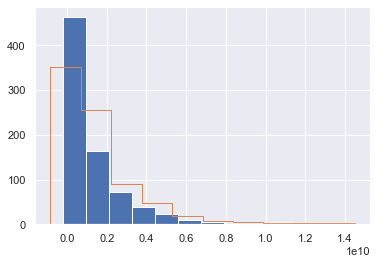

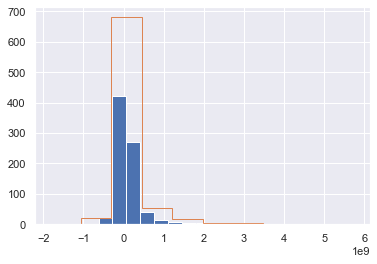

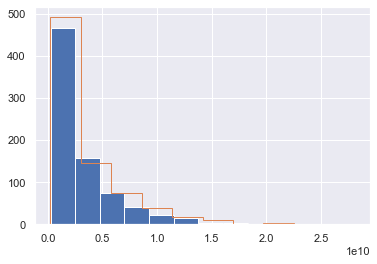

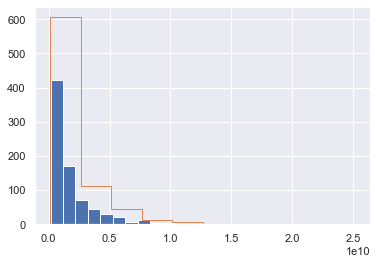

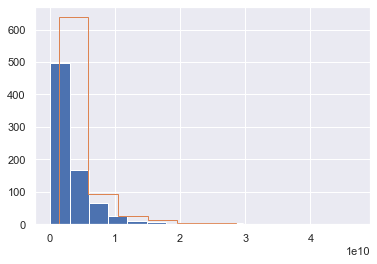

In [30]:
fig, ax = plt.subplots()
ax.hist(df_prep["TOTAL PATRIMONIO 2017"])
ax.hist(df_prep["TOTAL PATRIMONIO 2018"],histtype="step")
plt.show()
fig, ax = plt.subplots()
ax.hist(df_prep["GANANCIA (PERDIDA) 2017"])
ax.hist(df_prep["GANANCIA (PERDIDA) 2018"],histtype="step")
plt.show()
fig, ax = plt.subplots()
ax.hist(df_prep["TOTAL ACTIVOS 2017"])
ax.hist(df_prep["TOTAL ACTIVOS 2018"],histtype="step")
plt.show()
fig, ax = plt.subplots()
ax.hist(df_prep["TOTAL PASIVOS 2017"])
ax.hist(df_prep["TOTAL PASIVOS 2018"],histtype="step")
plt.show()
fig, ax = plt.subplots()
ax.hist(df_prep["INGRESOS OPERACIONALES\r\n2017*"])
ax.hist(df_prep["INGRESOS OPERACIONALES\r\n2018*"],histtype="step")
plt.show()

In [32]:
# Cambiar variables categoricas

"""label_encoder = LabelEncoder()
df_prep["SUPERVISOR"] = label_encoder.fit_transform(df_prep["SUPERVISOR"])
df_prep["REGIÓN"] = label_encoder.fit_transform(df_prep["REGIÓN"])
df_prep["DEPARTAMENTO DOMICILIO"] = label_encoder.fit_transform(df_prep["DEPARTAMENTO DOMICILIO"])
df_prep["CIUDAD DOMICILIO"] = label_encoder.fit_transform(df_prep["CIUDAD DOMICILIO"])
df_prep["CIIU"] = label_encoder.fit_transform(df_prep["CIIU"])
df_prep["MACROSECTOR"] = label_encoder.fit_transform(df_prep["MACROSECTOR"])
df_prep["GRUPO EN NIIF"] = label_encoder.fit_transform(df_prep["GRUPO EN NIIF"])

df_prep.dtypes"""

'label_encoder = LabelEncoder()\ndf_prep["SUPERVISOR"] = label_encoder.fit_transform(df_prep["SUPERVISOR"])\ndf_prep["REGIÓN"] = label_encoder.fit_transform(df_prep["REGIÓN"])\ndf_prep["DEPARTAMENTO DOMICILIO"] = label_encoder.fit_transform(df_prep["DEPARTAMENTO DOMICILIO"])\ndf_prep["CIUDAD DOMICILIO"] = label_encoder.fit_transform(df_prep["CIUDAD DOMICILIO"])\ndf_prep["CIIU"] = label_encoder.fit_transform(df_prep["CIIU"])\ndf_prep["MACROSECTOR"] = label_encoder.fit_transform(df_prep["MACROSECTOR"])\ndf_prep["GRUPO EN NIIF"] = label_encoder.fit_transform(df_prep["GRUPO EN NIIF"])\n\ndf_prep.dtypes'

In [33]:
df_prep=df_prep.drop(columns='NIT')
df_prep=df_prep.drop(columns='RAZON SOCIAL')
df_prep

,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
No.,,,,,,,,,,,,,,,,,
1,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,"C2711 - Fabricación de motores, generadores y ...",MANUFACTURA,3.571775e+09,-58725480.0,2.956848e+09,2.476739e+09,4.801089e+08,4.005049e+09,-87529000.0,2.875460e+09,2.341172e+09,5.342871e+08,NIIF PLENAS-GRUPO 1
2,SUPERSOCIEDADES,Costa Atlántica,MAGDALENA,SANTA-MARTA-MAGDALENA,G4610 - Comercio al por mayor a cambio de una ...,COMERCIO,6.018902e+09,35049440.0,1.207011e+09,1.031424e+09,1.755873e+08,4.994552e+09,10837770.0,1.020832e+09,8.949865e+08,1.258455e+08,NIIF PLENAS-GRUPO 1
3,SUPERSOCIEDADES,Costa Pacífica,VALLE,CALI-VALLE,F4111 - Construcción de edificios residenciales,CONSTRUCCIÓN,1.739284e+09,17351050.0,3.030767e+09,2.163544e+09,8.672231e+08,1.039942e+09,-38772470.0,2.615650e+09,1.748991e+09,8.666590e+08,NIIF PLENAS-GRUPO 1
5,SUPERSOCIEDADES,Centro - Oriente,NORTE DE SANTANDER,CUCUTA-NORTE DE SANTANDER,C2392 - Fabricación de materiales de arcilla p...,MANUFACTURA,1.419514e+09,4582130.0,1.498588e+09,4.971313e+08,1.001457e+09,1.360935e+09,32504600.0,1.509246e+09,4.902009e+08,1.019045e+09,NIIF PYMES-GRUPO 2
6,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4645 - Comercio al por mayor de productos far...,COMERCIO,3.095478e+09,209150040.0,1.305191e+09,6.496280e+08,6.555631e+08,2.756663e+09,71962150.0,1.022643e+09,5.762303e+08,4.464130e+08,NIIF PLENAS-GRUPO 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,SUPERSOCIEDADES,Costa Atlántica,ATLANTICO,BARRANQUILLA-ATLANTICO,J5914 - Actividades de exhibición de películas...,SERVICIOS,1.358630e+09,42729320.0,2.218099e+09,1.187529e+09,1.030570e+09,1.258237e+09,40344100.0,2.208604e+09,1.220842e+09,9.877623e+08,NIIF PYMES-GRUPO 2
1063,SUPERSOCIEDADES,Centro - Oriente,SANTANDER,GIRON-SANTANDER,G4645 - Comercio al por mayor de productos far...,COMERCIO,2.837806e+09,240941300.0,1.195751e+09,6.874504e+08,5.083009e+08,1.757854e+09,160459250.0,7.971858e+08,4.265948e+08,3.705911e+08,NIIF PYMES-GRUPO 2
1064,SUPERSOCIEDADES,Costa Pacífica,VALLE,CANDELARIA-VALLE,C1030 - Elaboración de aceites y grasas de ori...,MANUFACTURA,1.386317e+09,22151990.0,5.014167e+08,2.745892e+08,2.268275e+08,1.189203e+09,6154480.0,6.466120e+08,3.969365e+08,2.496755e+08,NIIF PLENAS-GRUPO 1


In [34]:
df_prep.dtypes

SUPERVISOR                          object
REGIÓN                              object
DEPARTAMENTO DOMICILIO              object
CIUDAD DOMICILIO                    object
CIIU                                object
MACROSECTOR                         object
INGRESOS OPERACIONALES\r\n2018*    float64
GANANCIA (PERDIDA) 2018            float64
TOTAL ACTIVOS 2018                 float64
TOTAL PASIVOS 2018                 float64
TOTAL PATRIMONIO 2018              float64
INGRESOS OPERACIONALES\r\n2017*    float64
GANANCIA (PERDIDA) 2017            float64
TOTAL ACTIVOS 2017                 float64
TOTAL PASIVOS 2017                 float64
TOTAL PATRIMONIO 2017              float64
GRUPO EN NIIF                       object
dtype: object

In [35]:
df_prep1 = df_prep.copy()

In [36]:
df_prep1=df_prep1.drop(columns='INGRESOS OPERACIONALES\r\n2018*')
df_prep1=df_prep1.drop(columns='GANANCIA (PERDIDA) 2018')
df_prep1=df_prep1.drop(columns='TOTAL ACTIVOS 2018')
df_prep1=df_prep1.drop(columns='TOTAL PASIVOS 2018')
df_prep1=df_prep1.drop(columns='INGRESOS OPERACIONALES\r\n2017*')
df_prep1=df_prep1.drop(columns='GANANCIA (PERDIDA) 2017')
df_prep1=df_prep1.drop(columns='TOTAL ACTIVOS 2017')
df_prep1=df_prep1.drop(columns='TOTAL PASIVOS 2017')
df_prep1=df_prep1.drop(columns='TOTAL PATRIMONIO 2018')
df_prep1=df_prep1.drop(columns='TOTAL PATRIMONIO 2017')
df_prep1=df_prep1.drop(columns='GRUPO EN NIIF')

In [37]:
df_prep1 = df_prep[['SUPERVISOR', 'REGIÓN', 'DEPARTAMENTO DOMICILIO', 'CIUDAD DOMICILIO','MACROSECTOR','GRUPO EN NIIF']].copy()

In [38]:
df_prep1

,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,MACROSECTOR,GRUPO EN NIIF
No.,,,,,,
1,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,MANUFACTURA,NIIF PLENAS-GRUPO 1
2,SUPERSOCIEDADES,Costa Atlántica,MAGDALENA,SANTA-MARTA-MAGDALENA,COMERCIO,NIIF PLENAS-GRUPO 1
3,SUPERSOCIEDADES,Costa Pacífica,VALLE,CALI-VALLE,CONSTRUCCIÓN,NIIF PLENAS-GRUPO 1
5,SUPERSOCIEDADES,Centro - Oriente,NORTE DE SANTANDER,CUCUTA-NORTE DE SANTANDER,MANUFACTURA,NIIF PYMES-GRUPO 2
6,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,COMERCIO,NIIF PLENAS-GRUPO 1
...,...,...,...,...,...,...
1062,SUPERSOCIEDADES,Costa Atlántica,ATLANTICO,BARRANQUILLA-ATLANTICO,SERVICIOS,NIIF PYMES-GRUPO 2
1063,SUPERSOCIEDADES,Centro - Oriente,SANTANDER,GIRON-SANTANDER,COMERCIO,NIIF PYMES-GRUPO 2
1064,SUPERSOCIEDADES,Costa Pacífica,VALLE,CANDELARIA-VALLE,MANUFACTURA,NIIF PLENAS-GRUPO 1


In [39]:
# Obtener cambios del 2017 al 2018

df_prep['CAMBIO EN INGRESOS OPERACIONALES 2017-2018'] = df_prep['INGRESOS OPERACIONALES\r\n2018*'] - df_prep['INGRESOS OPERACIONALES\r\n2017*']
df_prep['CAMBIO EN GANANCIA (PERDIDA) 2017-2018'] = df_prep['GANANCIA (PERDIDA) 2018'] - df_prep['GANANCIA (PERDIDA) 2017']
df_prep['CAMBIO TOTAL ACTIVOS 2017-2018'] = df_prep['TOTAL ACTIVOS 2018'] - df_prep['TOTAL ACTIVOS 2017']
df_prep['CAMBIO TOTAL PASIVOS 2017-2018'] = df_prep['TOTAL PASIVOS 2018'] - df_prep['TOTAL PASIVOS 2017']
df_prep['CAMBIO TOTAL PATRIMONIO 2017-2018'] = df_prep['TOTAL PATRIMONIO 2018'] - df_prep['TOTAL PATRIMONIO 2017']

In [40]:
# Aplicar métodos para normalizar y estandarizar los datos para el modelo

df_prep_2 = df_prep[['CAMBIO EN INGRESOS OPERACIONALES 2017-2018', 'CAMBIO EN GANANCIA (PERDIDA) 2017-2018', 'CAMBIO TOTAL PATRIMONIO 2017-2018', 'CAMBIO TOTAL ACTIVOS 2017-2018', 'CAMBIO TOTAL PASIVOS 2017-2018']].copy()

mms = MinMaxScaler()


df_prep_norm = mms.fit_transform(df_prep_2.copy())
saved_cols = df_prep_2.columns

df_prep_norm = pd.DataFrame(df_prep_norm, columns =saved_cols)

In [41]:
# Mirar los estadísticos y revisar el resultado de la normalización

df_prep_norm.describe()

,CAMBIO EN INGRESOS OPERACIONALES 2017-2018,CAMBIO EN GANANCIA (PERDIDA) 2017-2018,CAMBIO TOTAL PATRIMONIO 2017-2018,CAMBIO TOTAL ACTIVOS 2017-2018,CAMBIO TOTAL PASIVOS 2017-2018
count,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.066814,0.317592,0.090953,0.273205,0.143879
std,0.056592,0.057757,0.049656,0.040357,0.040404
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.053782,0.307136,0.079647,0.262474,0.134453
50%,0.057796,0.313780,0.082929,0.266474,0.138102
75%,0.064873,0.323505,0.089158,0.273496,0.145339
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelamiento

Text(0, 0.5, 'Distance')

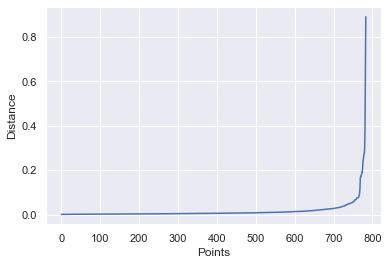

In [42]:
k = 10
data_nn = df_prep_norm

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")


(array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         16.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

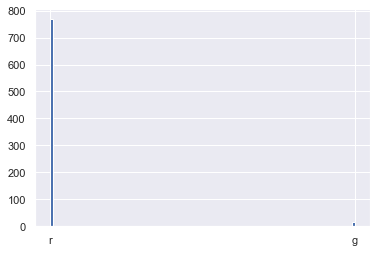

In [43]:
data = DBSCAN(eps=0.1, min_samples=5).fit_predict(df_prep_norm)
cols = { 
  0: 'r',
  -1: 'g'
}

data = [cols.get(d) for d in data]
plt.hist(data,bins=100)

Text(0, 0.5, 'CAMBIO EN GANANCIA (PERDIDA) 2017-2018')

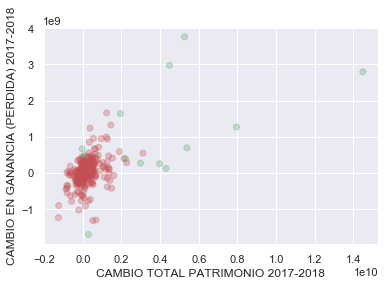

In [63]:
plt.scatter(df_prep['CAMBIO TOTAL PATRIMONIO 2017-2018'],df_prep["CAMBIO EN GANANCIA (PERDIDA) 2017-2018"],c=data,alpha=0.3)
plt.xlabel('CAMBIO TOTAL PATRIMONIO 2017-2018')
plt.ylabel("CAMBIO EN GANANCIA (PERDIDA) 2017-2018")

Text(0, 0.5, 'CAMBIO EN INGRESOS OPERACIONALES 2017-2018')

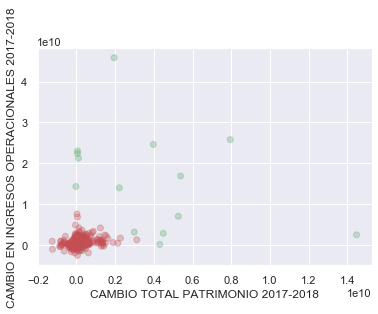

In [64]:
plt.scatter(df_prep['CAMBIO TOTAL PATRIMONIO 2017-2018'],df_prep["CAMBIO EN INGRESOS OPERACIONALES 2017-2018"],c=data,alpha=0.3)
plt.xlabel('CAMBIO TOTAL PATRIMONIO 2017-2018')
plt.ylabel("CAMBIO EN INGRESOS OPERACIONALES 2017-2018")

Text(0, 0.5, 'CAMBIO EN INGRESOS OPERACIONALES 2017-2018')

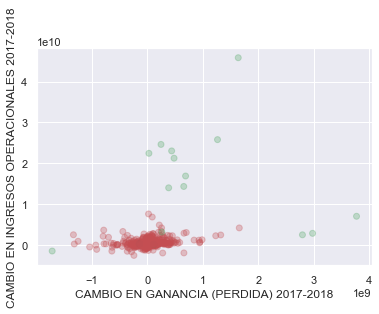

In [65]:
plt.scatter(df_prep['CAMBIO EN GANANCIA (PERDIDA) 2017-2018'],df_prep["CAMBIO EN INGRESOS OPERACIONALES 2017-2018"],c=data,alpha=0.3)
plt.xlabel('CAMBIO EN GANANCIA (PERDIDA) 2017-2018')
plt.ylabel("CAMBIO EN INGRESOS OPERACIONALES 2017-2018")

Text(0, 0.5, 'CAMBIO TOTAL PATRIMONIO 2017-2018')

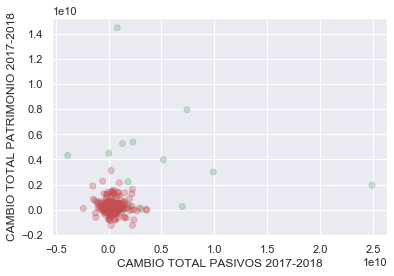

In [69]:
plt.scatter(df_prep['CAMBIO TOTAL PASIVOS 2017-2018'],df_prep["CAMBIO TOTAL PATRIMONIO 2017-2018"],c=data,alpha=0.3)
plt.xlabel('CAMBIO TOTAL PASIVOS 2017-2018')
plt.ylabel("CAMBIO TOTAL PATRIMONIO 2017-2018")

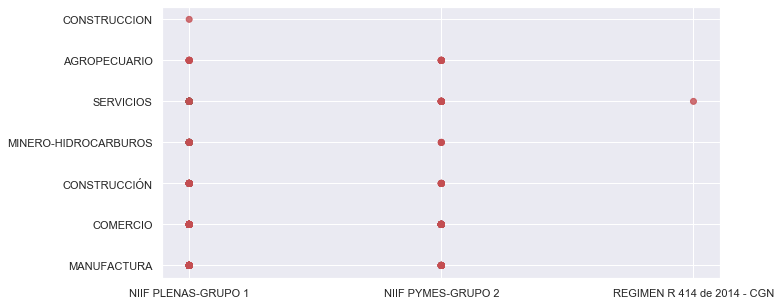

In [44]:
plt.show()
plt.figure(figsize=(10,5))
plt.scatter(df_prep1['GRUPO EN NIIF'],df_prep1["MACROSECTOR"],c=data,alpha=0.8)
plt.show()

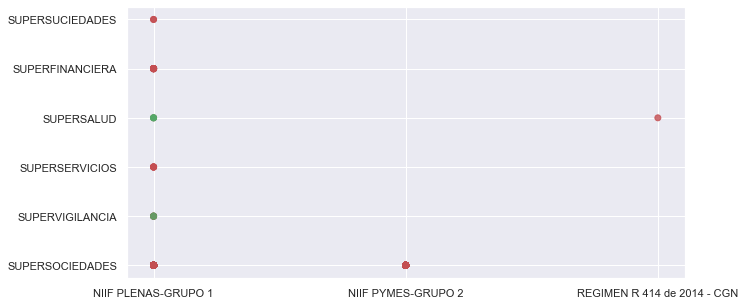

In [45]:
plt.show()
plt.figure(figsize=(10,5))
plt.scatter(df_prep1['GRUPO EN NIIF'],df_prep1["SUPERVISOR"],c=data,alpha=0.8)
plt.show()

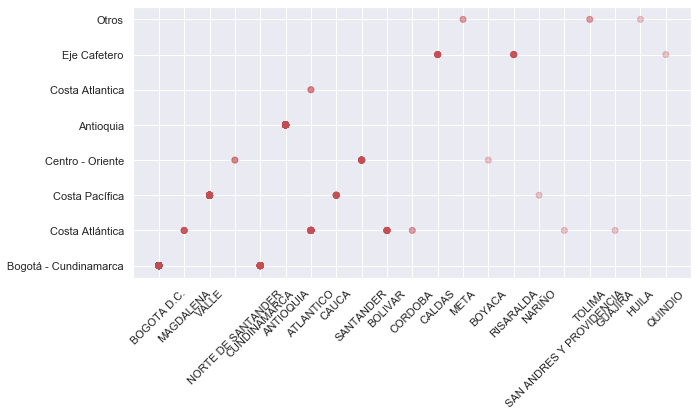

In [68]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
ax = plt.scatter(df_prep1['DEPARTAMENTO DOMICILIO'],df_prep1["REGIÓN"],c=data,alpha=0.3)

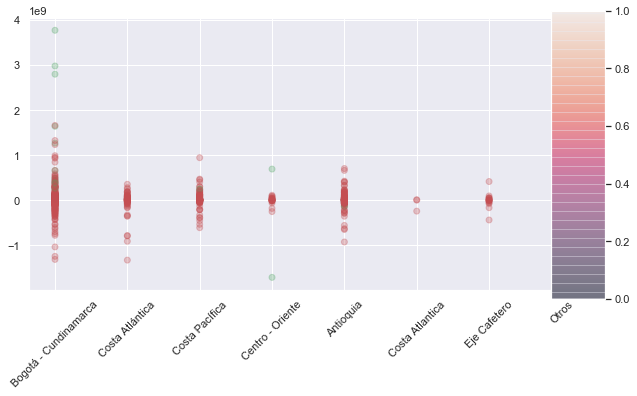

In [60]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.scatter(df_prep['REGIÓN'],df_prep["CAMBIO EN GANANCIA (PERDIDA) 2017-2018"],c=data,alpha=0.3)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

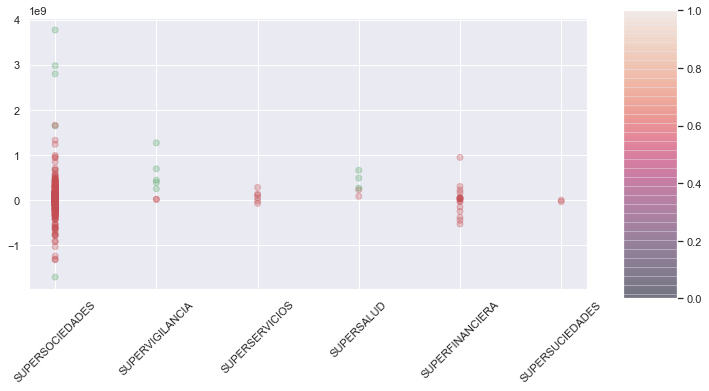

In [59]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.scatter(df_prep['SUPERVISOR'],df_prep["CAMBIO EN GANANCIA (PERDIDA) 2017-2018"],c=data,alpha=0.3)
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

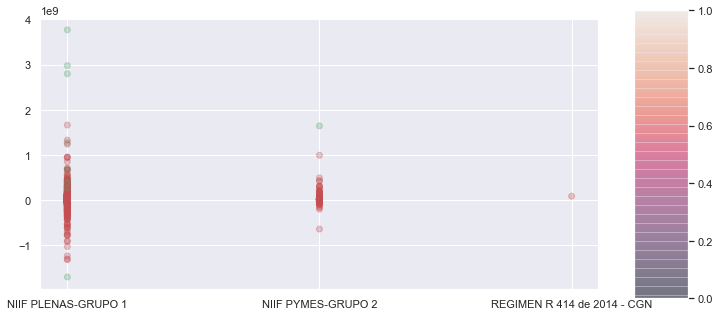

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(df_prep['GRUPO EN NIIF'],df_prep["CAMBIO EN GANANCIA (PERDIDA) 2017-2018"],c=data,alpha=0.3)
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

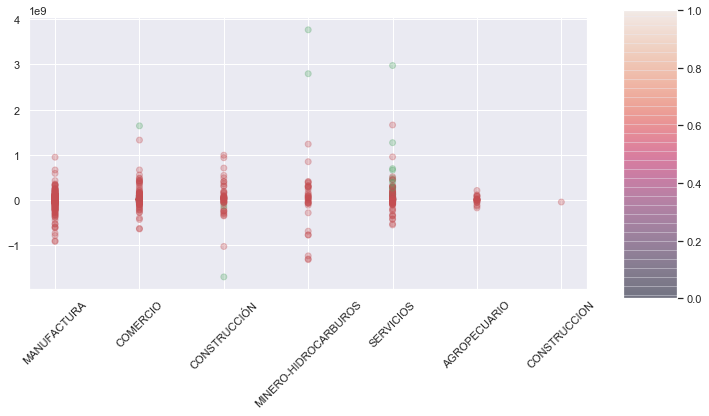

In [58]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.scatter(df_prep['MACROSECTOR'],df_prep["CAMBIO EN GANANCIA (PERDIDA) 2017-2018"],c=data,alpha=0.3)
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)


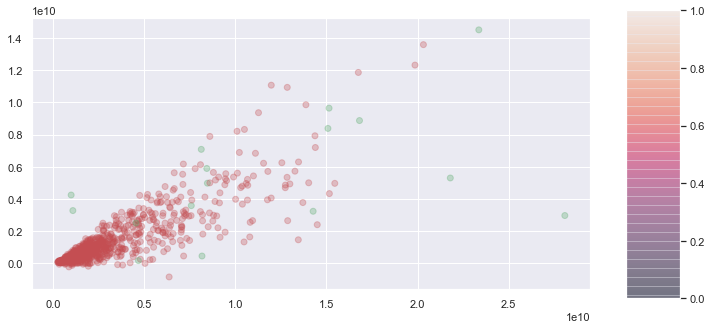

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(df_prep['TOTAL ACTIVOS 2018'],df_prep["TOTAL PATRIMONIO 2018"],c=data,alpha=0.3)
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)